<center><h2> Module 3 Project</h2></center>
<center><h2> Hypothesis Testing</h2></center>

**Authors:** Ashray Shetty, Fadi Sharaf

#### Business Problem

Modern music streaming apps have allowed users to listen to music based on their mood and preference withouut being constrained by limitation of space or money. Use of such apps like, spotify has greatly benefited the music industry, by giving users access to songs they would otherwise lack. 

Even though the streaming apps allow users to access songs, the mere availability of millions of songs restrict what the users can really discover. Also the use of data from such streaming apps have allowed us to discover patterns and trends in users preference for songs. One such trend is in the seasonaly preference for songs with different energy and acousticness. Certain seasons evoke certain moods which thereby result in users preferring a songs with the right attribute to match the season. We also understand that users prefer streaming different music based on economic performance of the country they reside in.

We therefore wanted to examine if the music industry is uptodate with such trends and do they release songs with certain attributes based on seasons and economy. The attributes we chose to examine is energy, acousticness and danceability. These are attributes of song provided by spotify which is a value between 0 and 1, and they indicate the following:

> 1. **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
> 2. **Danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
> 3. **Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

The hypothesis which we are planing to investigate and test are as follows:

> **Hypothesis 1: Are there trends in the energy of songs release during economic downturn?**
>
> 1. Null: There is no change in the energy of songs when the economy is down
> 2. Alternative: Songs become more energetic when the economy is down.

> **Hypothesis 2: Are there seasonal trends in the release of high energy songs?**
>
> 1. Null: There is no change in energy of songs between differnt seasons.
> 2. Alternative: Songs have more energy during the summer seasons.

> **Hypothesis 3: Does the acousticness of songs released change depending on seasons?**
>
> 1. Null: The Season has no affect on the release of more accoustic songs
> 2. Alternative: Artist release more accoustic songs during winter.

> **Hypothesis 4: Does the measure of danceability of song change depending on the economy of the country?**
>
> 1. Null: Songs are not becoming more danceable
> 2. Alternative: Songs in 2018 are more danceable than songs in 1999.
    


#### Analysis

In [6]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import data_cleaning as dc
import hypothesis_tests as hypo
import data_cleaning as clean

#dirty_data = pd.read_csv('./data/dirty_data.csv')
#cleaned_data = dc.full_clean(dirty_data)


# Analysis Hypothesis 1

Are there trends in the energy of songs release during economic downturn?

After doloading the data of the Billboard year-end top 100 for the last 50 years we wanted to see what happens during an economic downturn. 


Means: 
2009 mean value: 0.7307365
Population mean value: 0.641028025
Standard Deviations
2009 std value: 0.020342068915181664
pop std value: 0.033766937074775905
p-value 7.534127001345836e-57
we reject null hypothesis


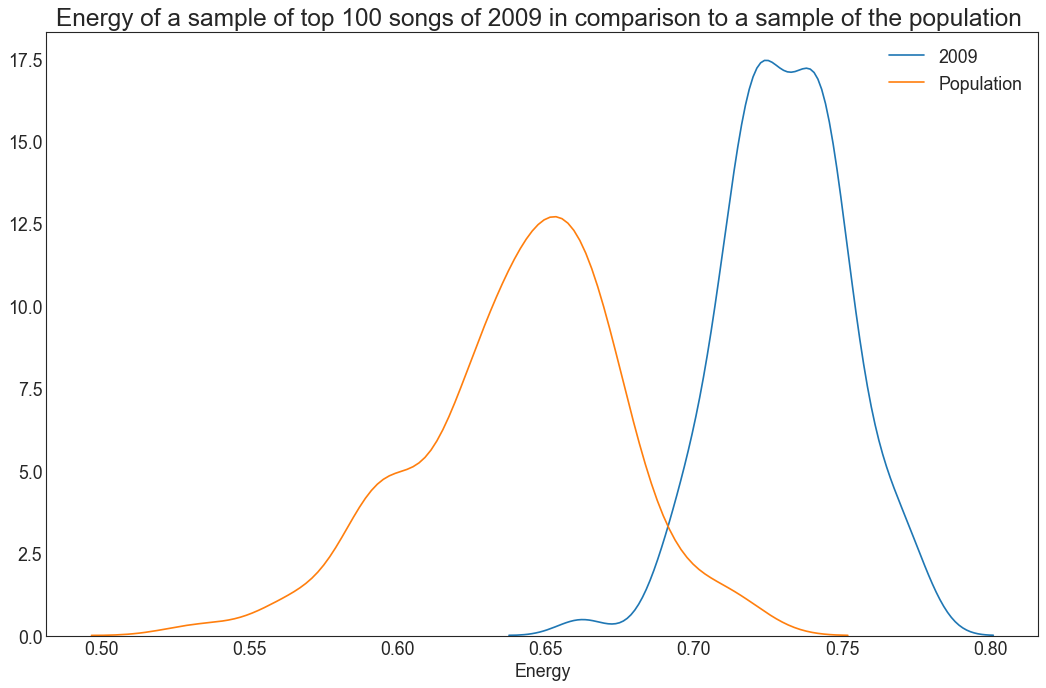

In [8]:
status, viz = hypo.hypothesis_test_one(alpha = 0.05,verbose = True)

# Analysis for hypothesis 2 and 3

In [4]:


df = pd.read_csv('Song Dataset.csv')

# creating two new column
df['year'] = df['release_date'].map(lambda x: x[:4])
df['month'] = df['release_date'].map(lambda x: x[5:7])
df = df[df.month != ''] # this is because some tracks only have a year mentioned.

# We need to make sure that the new columns are of type int so we can work with them more effectively
df['year'] = df.year.astype(int, inplace=True)
df['month'] = df.month.astype(int, inplace=True)

test_features = ['year', 'month','energy','acousticness']
data = df.loc[:,test_features]
data['seasons'] = data['month'].map(lambda x: clean.seasons(x))

# testing our hypothesis
dftest = data[['seasons','energy','acousticness']]

# testing for all 20 years
features_to_test = ['energy', 'acousticness']
testframe = hypo.seasons_stratifier(dftest)

result = hypo.anova(testframe, 'seasons', features_to_test)
result[['F','PR(>F)', 'eta_sq']]

,F,PR(>F),eta_sq
ANOVA of Energy against Seasons,1.765784,0.151459,0.001324
ANOVA of Acousticness against Seasons,4.339256,0.004640,0.003247


### Carrying out hypothesis 2 and 3 testing for each year for last 20 years

In [5]:
dftest2 = data[['year','seasons','energy','acousticness']]
years = [i for i in range (1999, 2019)]

hypo.anova_loop(dftest2, 'seasons', ['energy'], dftest2['year'], years, compact=True)

,F,PR(>F),eta_sq
ANOVA of Energy against Seasons for 1999,8.69654,9.50039e-06,0.00648658
ANOVA of Energy against Seasons for 2000,10.6777,5.46898e-07,0.00795252
ANOVA of Energy against Seasons for 2001,5.97865,0.000461666,0.00446842
ANOVA of Energy against Seasons for 2002,11.1357,2.82142e-07,0.00829084
ANOVA of Energy against Seasons for 2003,8.26494,1.76571e-05,0.00616665
ANOVA of Energy against Seasons for 2004,7.68831,4.0354e-05,0.00573888
ANOVA of Energy against Seasons for 2005,2.59814,0.0506066,0.00194676
ANOVA of Energy against Seasons for 2006,1.48519,0.216462,0.00111377
ANOVA of Energy against Seasons for 2007,3.31561,0.0191206,0.00248301
ANOVA of Energy against Seasons for 2008,6.61756,0.000186203,0.00494358


In [6]:
hypo.anova_loop(dftest2, 'seasons', ['acousticness'], dftest2['year'], years, compact=True)

,F,PR(>F),eta_sq
ANOVA of Acousticness against Seasons for 1999,3.74026,0.0106603,0.00280014
ANOVA of Acousticness against Seasons for 2000,10.5819,6.28029e-07,0.00788174
ANOVA of Acousticness against Seasons for 2001,4.6695,0.00292462,0.00349338
ANOVA of Acousticness against Seasons for 2002,6.63044,0.000182818,0.00495315
ANOVA of Acousticness against Seasons for 2003,16.7326,8.4259e-11,0.0124062
ANOVA of Acousticness against Seasons for 2004,1.86897,0.132567,0.00140116
ANOVA of Acousticness against Seasons for 2005,6.80111,0.000143354,0.00508
ANOVA of Acousticness against Seasons for 2006,1.27246,0.282026,0.00095439
ANOVA of Acousticness against Seasons for 2007,2.65716,0.0467503,0.00199089
ANOVA of Acousticness against Seasons for 2008,2.31893,0.0734561,0.00173791


# Analysis Hypothesis 4

Does the measure of danceability of song change depend on the economy of the country?

Using data of 10,000 songs for 1999 and for 2018 we created sample distibutions to analyze wether songs have become more danceable.


 Welch's t-test= -267.3338 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 1997.8893


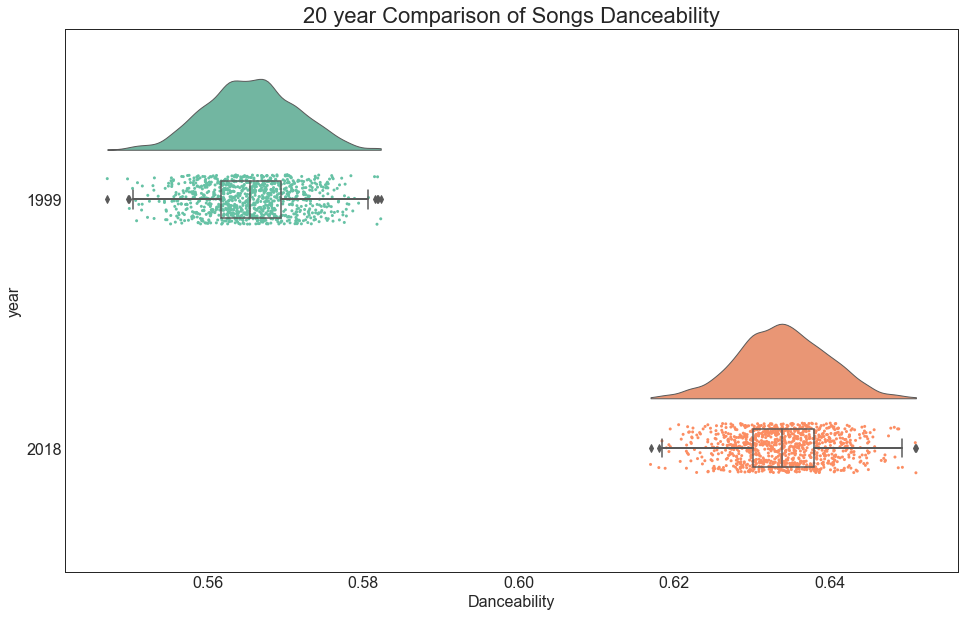

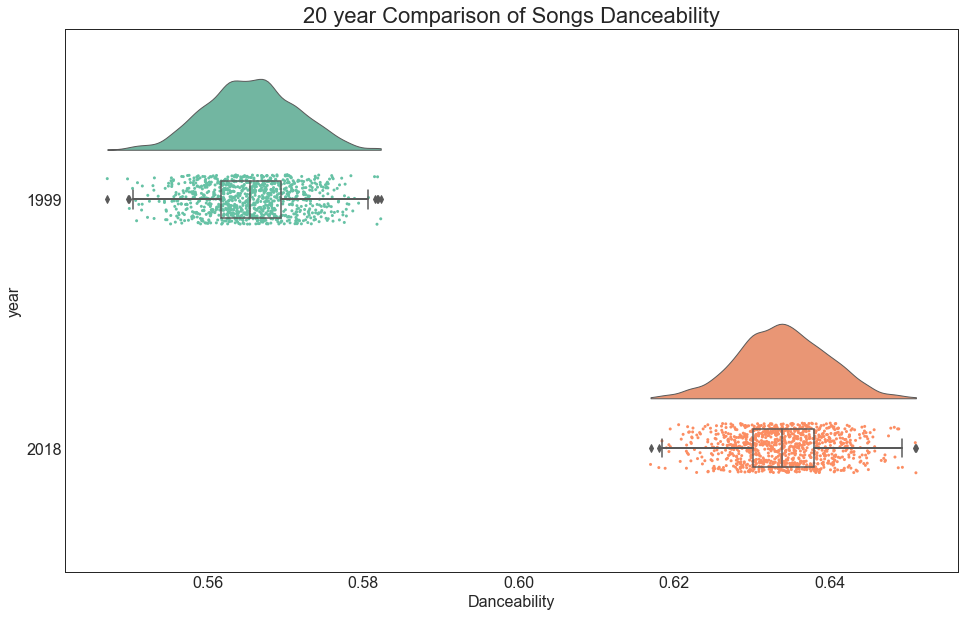

In [10]:
hypo.hypothesis_test_four()

We can clearly see that the songs of 2018 are more danceable than that of 1999.


#### Findings & Application

We dont find any seasonal trends in the energy and acousticness of songs release through the year. It seems that many in the music indusrty release songs at random regardless of publics general mood during that time of year.

We do however notice that the atrributes of song change during economic downturn. From our statistical testing we had enough evidence to reject the null hypothesis, but we still cannot certainly accept the alternative hypothesis and there could be the existence of factors or variables which we may have missed. Economy is almost always connected with a lot of other industry. Sometimes the connection may be direct, but often there are hidden factors. Our analysis would points us to examine the relationship further. 

#### Limitations

There were a few limitatons which reduce the scope and applicability of our findings in general, most notable among these include:

> 1) **Use of just spotify and billboard 100 data**: These data only provide us with a narrow perspective
>
> 2) **Spotify data collected at random irrespective of location**: In order to understand seasonal trends we have to defins seaons accordingly. Since we collected data at random from all over the world, we have no way to defining seasons appropriately for this analysis. This limits the scope of our analysis
>
> 3) **Low effect size**: The effect size we observed were very low and indicates that a influence is any could be due to the random variance we observe in our data itself. 
>
> 4) **High variance of data collected**: We had several data points and they showed a lot of variance, sampling such a data is problmatic.

#### Next Steps

We could try to identify songs which were popular during the year and see if they should any seasonal trends.

We could also restrict our analysis to a specific location and check for the influence of artist in that location.

We did not subset data based on popular artist, for future work we could subset and check how popular artists are correlated with our work. 